### Read data 

In [1]:
import pandas as pd
df=pd.read_csv('clean_df.csv')


In [2]:
df.head()

,Score,Summary,Text,clean_text,count
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,buy several vitality dog food products find go...,22
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrive label jumbo salt peanutsthe pea...,18
2,4,"""Delight"" says it all",This is a confection that has been around a fe...,confection around centuries light pillowy citr...,39
3,2,Cough Medicine,If you are looking for the secret ingredient i...,look secret ingredient robitussin believe find...,18
4,5,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,13


In [2]:
df.drop(['count'],axis=1,inplace=True)
df.head()

,Score,Summary,Text,clean_text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,buy several vitality dog food products find go...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrive label jumbo salt peanutsthe pea...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...,confection around centuries light pillowy citr...
3,2,Cough Medicine,If you are looking for the secret ingredient i...,look secret ingredient robitussin believe find...
4,5,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


In [4]:
df.isnull().sum()

Score         0
Summary       0
Text          0
clean_text    3
dtype: int64

In [5]:
df.shape

(393576, 4)

In [3]:
df.dropna(axis=0,inplace=True)  #dropping na

In [7]:
df.isnull().sum()

Score         0
Summary       0
Text          0
clean_text    0
dtype: int64

In [8]:
df.shape

(393573, 4)

### Model evaluation on  Cleaned Text data

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['clean_text'],df['Score'] ,test_size=0.33, random_state=42)

To make statistical algorithms work with text, we first have to convert text to numbers. To do so, three main approaches exist i.e. Bag of Words, TF-IDF and Word2Vec. 

For the Evaluation of the model here I am using two metrics:

<b>Accuracy:</b>Accuracy is a valid choice of evaluation for classification problems.Accuracy = Correct Predictions / Total Predictions 

<b>F1-Score:</b>The F-Measure is a popular metric for imbalanced classification.F-Measure = (2 * Precision * Recall) / (Precision + Recall)

#### Bag of words (BoW) model

Bag of Words model is used to preprocess the text by converting it into a bag of words, which keeps a count of the total occurrences of most frequently used words.

In the bag of words approach the first step is to create a vocabulary of all the unique words. The next step is to convert each document into a feature vector using the vocabulary. The length of each feature vector is equal to the length of the vocabulary. The frequency of the word in the document will replace the actual word in the vocabulary. If a word in the vocabulary is not found in the corresponding document, the document feature vector will have zero in that place.


 
 <b>CountVectorizer:</b>Counting the number of times each word appears in a document.
 


### Count vectorizer

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()

In [11]:
count_train=vec.fit_transform(X_train)
count_test=vec.transform(X_test)

In [12]:
tttt

NameError: name 'tttt' is not defined

### Count Vec- Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
para_grids = {
            "n_estimators" : [10,50,100],
           "max_features" : ["auto", "log2", "sqrt"],
            "max_depth": [5,10,15,20,25,30],
            "bootstrap"    : [True, False]
        }
rf = RandomForestClassifier()
rf_cv= GridSearchCV(estimator = rf, param_grid = para_grids,return_train_score=True, 
                          cv = 5, n_jobs = -1,verbose = 2)
# Fit it to the data
rf_cv.fit(count_train, y_train)
yr_pred = rf_cv.predict(count_test)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))

In [13]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
rf2 = RandomForestClassifier(n_estimators=100,max_features='auto',max_depth=5,
                             bootstrap=True)
# Fit it to the data
rf2.fit(count_train, y_train)
yr2_pred = rf2.predict(count_test)
# Print the tuned parameters and score
print('Train set Accuracy: ', metrics.accuracy_score(y_train, rf2.predict(count_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yr2_pred))

Train set Accuracy:  0.6372903338351795
Test set Accuracy:  0.6364644287034186


In [14]:
from yellowbrick.classifier import ConfusionMatrix

model = rf2

rf_cm = ConfusionMatrix(model)

rf_cm.fit(count_train, y_train)
rf_cm.score(count_test, y_test)

rf_cm.show()

C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


<Figure size 800x550 with 1 Axes>

C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


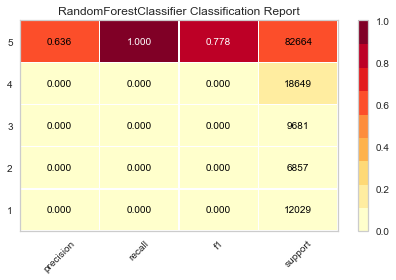

In [15]:
from yellowbrick.classifier import ClassificationReport
model = rf2
visualizer = ClassificationReport(model, support=True)

visualizer.fit(count_train, y_train)        # Fit the visualizer and the model
visualizer.score(count_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

The F-Measure is a popular metric for imbalanced classification.Our model managed to get F1-score .778

C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


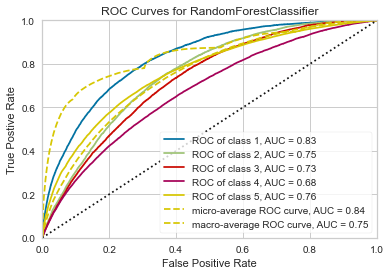

In [16]:
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model and visualizer
# logistic = LogisticRegression()
visualizer = ROCAUC(rf2)

visualizer.fit(count_train, y_train)  # Fit the training data to the visualizer
visualizer.score(count_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

### Count Vec-Logistic Regression

In [17]:
#from sklearn.metrics import make_scorer
#from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
lr_cv = GridSearchCV(classifier, param_grid=grid_values)
lr_cv.fit(count_train, y_train)
lr_cv_pred=lr_cv.predict(count_test)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(lr_cv.best_params_))
print("Best score is {}".format(lr_cv.best_score_))

C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation

C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL

C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Tuned Decision Tree Parameters: {'C': 0.1, 'penalty': 'l2'}
Best score is 0.708752217379643


In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1,penalty='l2')
lr.fit(count_train, y_train)
lr_pred=lr.predict(count_test)
# Print the tuned parameters and score
print('Train set Accuracy: ', metrics.accuracy_score(y_train, lr.predict(count_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, lr_pred))

C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train set Accuracy:  0.758374321654348
Test set Accuracy:  0.7056128734216199


C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


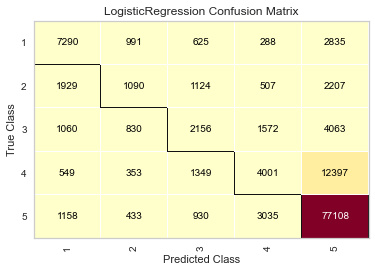

In [19]:
model = lr
lr_cm = ConfusionMatrix(model)
lr_cm.fit(count_train, y_train)
lr_cm.score(count_test, y_test)
lr_cm.show()

C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


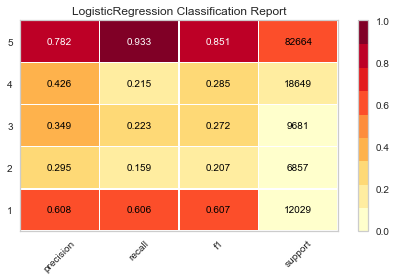

In [20]:
from yellowbrick.classifier import ClassificationReport
model = lr
visualizer = ClassificationReport(model, support=True)

visualizer.fit(count_train, y_train)        # Fit the visualizer and the model
visualizer.score(count_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

The F-Measure is a popular metric for imbalanced classification.A combination of countvectorizer with Logistic regression   managed to get F1-score .856

C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


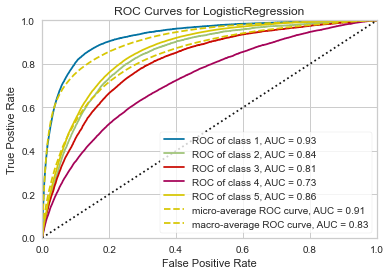

In [21]:
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model and visualizer
# logistic = LogisticRegression()
visualizer = ROCAUC(lr)

visualizer.fit(count_train, y_train)  # Fit the training data to the visualizer
visualizer.score(count_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

### Count Vec-Naive Base

In [22]:
from sklearn.naive_bayes import MultinomialNB
c_nb = MultinomialNB()
c_nb.fit(count_train, y_train)
cnb_y_pred = c_nb.predict(count_test)
print('Train set Accuracy: ', metrics.accuracy_score(y_train, c_nb.predict(count_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, cnb_y_pred))

Train set Accuracy:  0.7287982616148324
Test set Accuracy:  0.6837696335078534


#### TFID-F vectorizer

 <b>TFI-DF Vectorizer:</b>Calculating the frequency that each word appears in a document out of all the words in the document.
 
 
 The idea behind the TF-IDF approach is that the words that occur less in all the documents and more in individual document contribute more towards classification.TF-IDF is a combination of two terms. Term frequency and Inverse Document frequency. They can be calculated as:
 
 TF  = (Frequency of a word in the document)/(Total words in the document)

IDF = Log((Total number of docs)/(Number of docs containing the word))

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english',min_df=.02)#, max_df=0.7
#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(X_train) 
tfidf_test=tfidf_vectorizer.transform(X_test)


In [24]:
import numpy as np
tfidf_matrix = tfidf_train.toarray()
vocab = tfidf_vectorizer.get_feature_names()
pd.DataFrame(np.round(tfidf_matrix, 2), columns=vocab)

,able,absolutely,actually,add,ago,amaze,amazon,arrive,available,away,...,want,water,way,white,wish,wonderful,work,worth,year,years
0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.16,0.0,0.00
1,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.34
2,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
3,0.0,0.11,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.00
4,0.0,0.00,0.0,0.00,0.0,0.39,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263688,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
263689,0.0,0.00,0.0,0.19,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
263690,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
263691,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00


### Tfidf-Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr_tf = LogisticRegression(C=1,penalty='l2')
lr_tf.fit(tfidf_train, y_train)
lr_tf_pred=lr_tf.predict(tfidf_test)
# Print the tuned parameters and score
print('Train set Accuracy: ', metrics.accuracy_score(y_train, lr_tf.predict(tfidf_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, lr_tf_pred))

Train set Accuracy:  0.6746860932978881
Test set Accuracy:  0.6743917462272867


C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


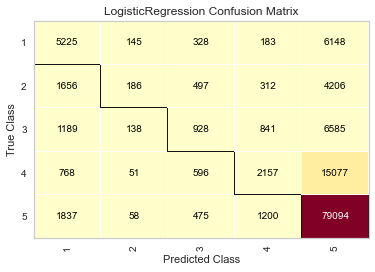

In [26]:
from yellowbrick.classifier import ConfusionMatrix

model = lr_tf

lr_tf_cm = ConfusionMatrix(model)

lr_tf_cm.fit(tfidf_train, y_train)
lr_tf_cm.score(tfidf_test, y_test)

lr_tf_cm.show()

C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


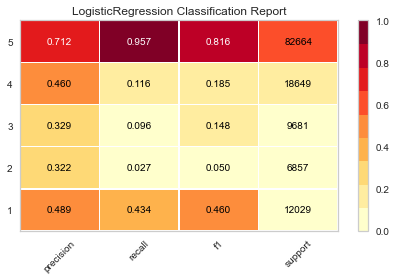

In [27]:
from yellowbrick.classifier import ClassificationReport
model = lr_tf
visualizer = ClassificationReport(model, support=True)

visualizer.fit(tfidf_train, y_train)        # Fit the visualizer and the model
visualizer.score(tfidf_test, y_test)        # Evaluate the model on the test data
visualizer.show()

C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


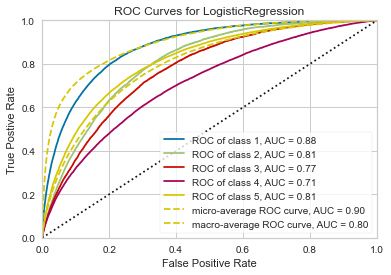

In [28]:
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model and visualizer
# logistic = LogisticRegression()
visualizer = ROCAUC(lr_tf)

visualizer.fit(tfidf_train, y_train)  # Fit the training data to the visualizer
visualizer.score(tfidf_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

### Tfidf-Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
rf_tf = RandomForestClassifier(n_estimators=100,max_features='auto',max_depth=30,
                               bootstrap=True)#class_weight={1:10, 2:12, 3:7, 4:9, 5:1},

# Fit it to the data
rf_tf.fit(tfidf_train, y_train)
rf_tf_pred = rf_tf.predict(tfidf_test)
# Print the tuned parameters and score
print('Train set Accuracy: ', metrics.accuracy_score(y_train, rf_tf.predict(tfidf_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, rf_tf_pred))


Train set Accuracy:  0.741733758575313
Test set Accuracy:  0.6584847551586079


C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


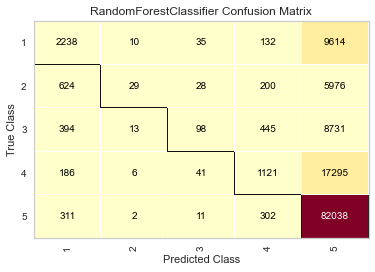

In [30]:
from yellowbrick.classifier import ConfusionMatrix

model = rf_tf

rf_tf_cm = ConfusionMatrix(model)

rf_tf_cm.fit(tfidf_train, y_train)
rf_tf_cm.score(tfidf_test, y_test)

rf_tf_cm.show()

C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


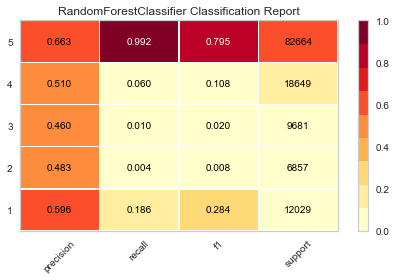

In [31]:
from yellowbrick.classifier import ClassificationReport
model = rf_tf
visualizer = ClassificationReport(model, support=True)

visualizer.fit(tfidf_train, y_train)        # Fit the visualizer and the model
visualizer.score(tfidf_test, y_test)        # Evaluate the model on the test data
visualizer.show()

C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


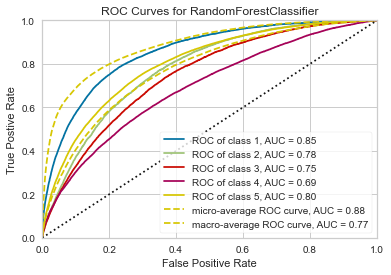

In [32]:
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model and visualizer
# logistic = LogisticRegression()
visualizer = ROCAUC(rf_tf)

visualizer.fit(tfidf_train, y_train)  # Fit the training data to the visualizer
visualizer.score(tfidf_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

### Word2vec


In [33]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(df['clean_text']))

In [34]:
print(data_words[:1])

[['buy', 'several', 'vitality', 'dog', 'food', 'products', 'find', 'good', 'quality', 'product', 'look', 'like', 'stew', 'process', 'meat', 'smell', 'better', 'labrador', 'finicky', 'appreciate', 'product', 'better']]


In [35]:
from gensim.models import word2vec

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 30          # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(data_words, size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=50,seed=42)

In [36]:
word_vec_unpack = [(word, idx.index) for word, idx in \
                   w2v_model.wv.vocab.items()]

tokens, indexes = zip(*word_vec_unpack)

word_vec_df = pd.DataFrame(w2v_model.wv.syn0[indexes, :], index=tokens)

display(word_vec_df.head())

C:\Users\reesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
buy,-2.715549,-0.692623,-8.000827,0.063198,5.225350,0.428997,0.647903,-0.470002,-2.875828,5.092991,...,-3.242857,1.359498,2.094988,-3.811380,-1.518296,0.231355,-1.982471,-4.488642,-0.465390,-2.105123
several,-4.329731,-1.242264,4.708892,-0.363263,-2.166711,-3.772234,-3.143095,0.819960,2.565447,-1.146286,...,-8.875030,-1.534986,3.810760,-6.810489,-2.441149,1.320820,-3.587014,-3.639526,1.786348,-0.722266
vitality,-2.263071,-0.119563,1.337652,-1.070055,4.113338,1.484137,-4.792086,-3.616505,-5.163167,0.486152,...,-1.149315,-0.193661,-0.767772,-2.104275,3.034974,-1.792050,1.474214,-1.518548,1.779250,1.580246
dog,-2.601198,-1.443985,-2.381466,-2.397625,3.716845,-3.002174,-0.123696,-0.107569,1.319595,-4.652072,...,0.858237,0.175282,-4.997033,-3.609613,-4.189283,8.867071,-0.885383,7.223353,-0.933421,-2.503263
food,-3.830259,-0.124951,0.254008,0.148100,-0.001550,1.464141,-2.398730,-5.481370,-0.653075,-0.976524,...,-1.426841,-0.336747,1.504704,-2.124742,-2.274050,1.049755,1.376176,1.756935,-2.090377,-1.435703


In [37]:
data_words_array = np.array(data_words)

model_array = np.array([word_vec_df.loc[doc].mean(axis=0) for doc in data_words_array])

In [38]:
w2v_df = pd.DataFrame(model_array)
w2v_df["Score"] = df["Score"]

display(w2v_df.head())

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Score
0,0.374640,0.260885,-0.128279,1.826998,-0.895231,0.437377,-0.834658,-1.299072,-0.593518,0.327444,...,0.064810,-0.178519,-0.799786,-0.834069,0.581968,0.123045,0.169393,-0.512787,-0.959888,5.0
1,2.198939,-1.047106,-1.540321,-0.546946,0.396007,-0.542365,1.208063,0.569887,0.181066,-1.267184,...,0.758735,-0.582778,0.240933,-0.305300,0.612979,1.271348,-0.955296,-1.213510,-1.058330,1.0
2,1.751569,-0.046061,0.245879,-0.842505,1.034613,-0.259288,0.075547,0.964595,-0.423362,-0.402976,...,0.099379,-0.552604,-0.530569,-0.564588,0.435469,-0.323038,0.204054,-0.253675,0.311690,4.0
3,-0.039842,1.973245,-0.132668,-0.659145,0.168355,0.374989,-0.508694,-1.099595,-2.535491,0.423188,...,0.698814,0.656605,-0.208410,0.316545,0.714349,0.537858,-0.013030,-0.302473,-0.299037,2.0
4,0.003849,0.459935,-0.989961,1.381252,0.003831,1.554585,0.493739,2.307848,1.216544,0.680296,...,-0.619594,-2.571688,0.038753,-2.725405,1.071534,-2.680308,-1.857794,-0.861906,-0.172157,5.0


In [39]:
w2v_df.shape

(393573, 101)

In [40]:
w2v_df = w2v_df.dropna(axis=0)
#display(w2v_df.head())

In [41]:
w2v_df.shape

(393570, 101)

In [42]:
from sklearn.model_selection import train_test_split

X = w2v_df.iloc[:, :-1]
y = w2v_df.iloc[:, -1]

w2v_X_train, w2v_X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

### Word2vec-Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
lr_w2v = LogisticRegression(C=1,penalty='l2')
lr_w2v.fit(w2v_X_train, y_train)
lr_w2v_pred=lr_w2v.predict(w2v_X_test)
# Print the tuned parameters and score
print('Train set Accuracy: ', metrics.accuracy_score(y_train, lr_w2v.predict(w2v_X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, lr_w2v_pred))

C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train set Accuracy:  0.6390019564499326
Test set Accuracy:  0.6394440633178342


### Word2vec-Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
rf_w2v = RandomForestClassifier(n_estimators=100,max_features='auto',max_depth=30,
                               bootstrap=True,class_weight='balanced')

# Fit it to the data
rf_w2v.fit(w2v_X_train, y_train)
rf_w2v_pred = rf_w2v.predict(w2v_X_test)
# Print the tuned parameters and score
print('Train set Accuracy: ', metrics.accuracy_score(y_train, rf_w2v.predict(w2v_X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, rf_w2v_pred))

Train set Accuracy:  0.9996188733897401
Test set Accuracy:  0.6387732804837767


C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


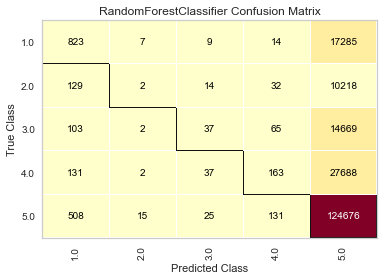

In [45]:
from yellowbrick.classifier import ConfusionMatrix

model = rf_w2v

rf_w2v_cm = ConfusionMatrix(model)

rf_w2v_cm.fit(w2v_X_train, y_train)
rf_w2v_cm.score(w2v_X_test, y_test)

rf_w2v_cm.show()

C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


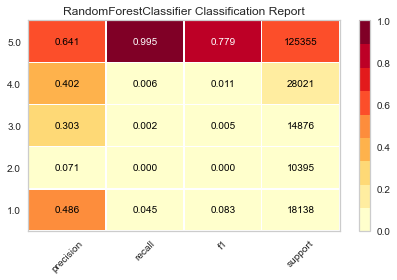

In [46]:
from yellowbrick.classifier import ClassificationReport
model = rf_w2v
visualizer = ClassificationReport(model, support=True)

visualizer.fit(w2v_X_train, y_train)        # Fit the visualizer and the model
visualizer.score(w2v_X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

## Artifical Nueral Networks

In [4]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

C:\Users\reesh\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\reesh\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\reesh\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\reesh\Anaconda3\envs\tensorflow\lib\site-packages

In [5]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 200000

In [6]:
sentences=df['clean_text'].values
sentences[0]

'buy several vitality dog food products find good quality product look like stew process meat smell better labrador finicky appreciate product better'

In [7]:
labels=df['Score'].values
labels[0]

5

In [8]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_labels = np_utils.to_categorical(encoded_labels)

Using TensorFlow backend.


In [9]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = dummy_labels[0:training_size]
testing_labels = dummy_labels[training_size:]

In [10]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [11]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 125       
Total params: 160,533
Trainable params: 160,533
Non-trainable params: 0
_________________________________________________________________


In [14]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Train on 200000 samples, validate on 193573 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 22s - loss: 0.2984 - acc: 0.8829 - val_loss: 0.2661 - val_acc: 0.8945
Epoch 2/10
 - 22s - loss: 0.2625 - acc: 0.8949 - val_loss: 0.2609 - val_acc: 0.8964
Epoch 3/10
 - 22s - loss: 0.2564 - acc: 0.8967 - val_loss: 0.2606 - val_acc: 0.8967
Epoch 4/10
 - 22s - loss: 0.2532 - acc: 0.8978 - val_loss: 0.2623 - val_acc: 0.8960
Epoch 5/10
 - 25s - loss: 0.2507 - acc: 0.8986 - val_loss: 0.2623 - val_acc: 0.8963
Epoch 6/10
 - 25s - loss: 0.2485 - acc: 0.8994 - val_loss: 0.2635 - val_acc: 0.8962
Epoch 7/10
 - 24s - loss: 0.2459 - acc: 0.9005 - val_loss: 0.2640 - val_acc: 0.8964
Epoch 8/10
 - 23s - loss: 0.2432 - acc: 0.9014 - val_loss: 0.2655 - val_acc: 0.8960
Epoch 9/10
 - 24s - loss: 0.2406 - acc: 0.9024 - val_loss: 0.2663 - val_acc: 0.8959
Epoch 10/10
 - 24s - loss: 0.2379 - acc: 0.9036 - val_loss: 0.2682 - val_acc: 0.8951


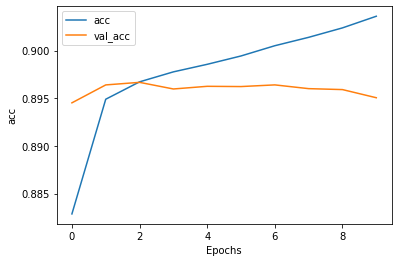

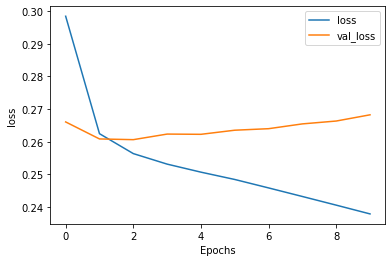

In [15]:
import matplotlib.pyplot as plt
model.metrics_names


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history,"acc")
plot_graphs(history,"loss")

In [16]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[0])
print(labels[0])

buy several vitality dog food products find good quality product look like stew process meat smell better labrador finicky appreciate product better ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
buy several vitality dog food products find good quality product look like stew process meat smell better labrador finicky appreciate product better
5


#### Predicting the Test set results

In [55]:
import numpy as np
rounded_labels=np.argmax(testing_labels, axis=1)

In [56]:
predictions = model.predict_classes(testing_padded)
# summarize the first 5 cases
for i in range(5):
    print('Original_Score',rounded_labels[i],'Predicted_Score',predictions[i])
    #print('%s => %s (expected %s)' % (testing_padded[i].tolist(), predictions[i], testing_labels[i]))

Original_Score 4 Predicted_Score 4
Original_Score 0 Predicted_Score 0
Original_Score 3 Predicted_Score 4
Original_Score 2 Predicted_Score 2
Original_Score 4 Predicted_Score 4


#### Making the Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels,predictions)
print(cm)


[[ 10310   1154   1199    482   4623]
 [  2592   1128   1992    788   3468]
 [  1361    823   3289   2614   5931]
 [   732    246   1837   6189  17910]
 [  1631    270   1370   4894 116740]]


In [51]:
Accuracy=accuracy_score(rounded_labels, predictions)
print(Accuracy)

0.711132234350865
